In [4]:
from sqlalchemy import create_engine
import pandas as pd
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt

# Konfigurasi visualisasi
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
# Koneksi ke MySQL
username = "root"   # Ganti dengan username MySQL
password = ""       # Isi jika ada password
host = "localhost"  # Sesuaikan dengan host MySQL
database = "workout_db"  # Nama database
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

# Ambil data dari MySQL
query = "SELECT * FROM obesity"
        
data = pd.read_sql(query, con=engine)
# Hapus kolom yang tidak relevan
irrelevant_columns = ['PhysicalActivityLevel']
for col in irrelevant_columns:
    if col in data.columns:
        data = data.drop(columns=[col])

data.head()

,Age,Gender,Height,Weight,BMI,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,Normal weight
1,69,Male,164.127306,89.959256,33.395209,Obese
2,46,Female,168.072202,72.930629,25.817737,Overweight
3,32,Male,168.459633,84.886912,29.912247,Overweight
4,60,Male,183.568568,69.038945,20.487903,Normal weight


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode gender dan obesitycategory
le_gender = LabelEncoder()
le_obesity = LabelEncoder()

df['gender'] = le_gender.fit_transform(df['gender'])
df['obesitycategory'] = le_obesity.fit_transform(df['obesitycategory'])

# Pisahkan fitur dan target
X = df[['age', 'gender', 'height', 'weight', 'bmi']]
y = df['obesitycategory']


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

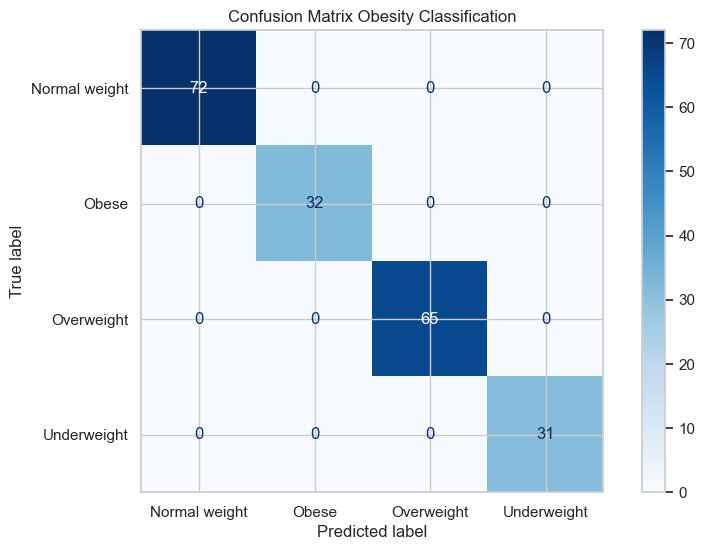

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Prediksi
y_pred = model.predict(X_test)

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_obesity.classes_)

# Tampilkan
disp.plot(cmap='Blues')
plt.title("Confusion Matrix Obesity Classification")
plt.show()


Text(0.5, 1.0, 'Confusion Matrix - Obesity Classification')

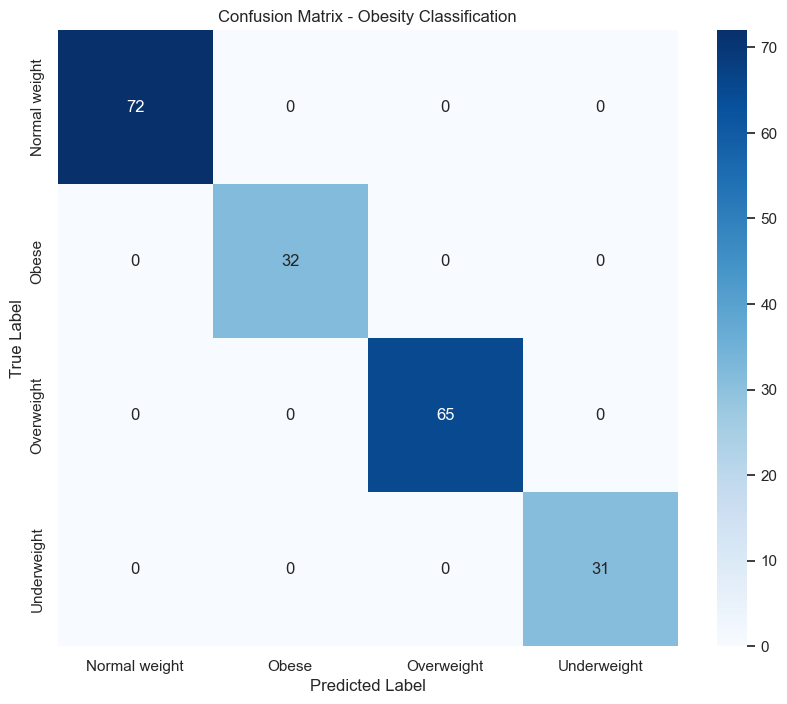

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# === Ambil data dari database (gunakan SQLAlchemy) ===
from sqlalchemy import create_engine
engine = create_engine("mysql+pymysql://root:@localhost/workout_db")

df = pd.read_sql("SELECT age, gender, height, weight, bmi, obesitycategory FROM obesity", engine)

# === Preprocessing ===
le_gender = LabelEncoder()
le_target = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])
df['obesitycategory'] = le_target.fit_transform(df['obesitycategory'])

X = df[['age', 'gender', 'height', 'weight', 'bmi']]
y = df['obesitycategory']

# === Train-Test Split dan Model ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# === Prediksi dan Confusion Matrix ===
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# === Plot Confusion Matrix seperti gambar ===
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_target.classes_,
            yticklabels=le_target.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Obesity Classification")



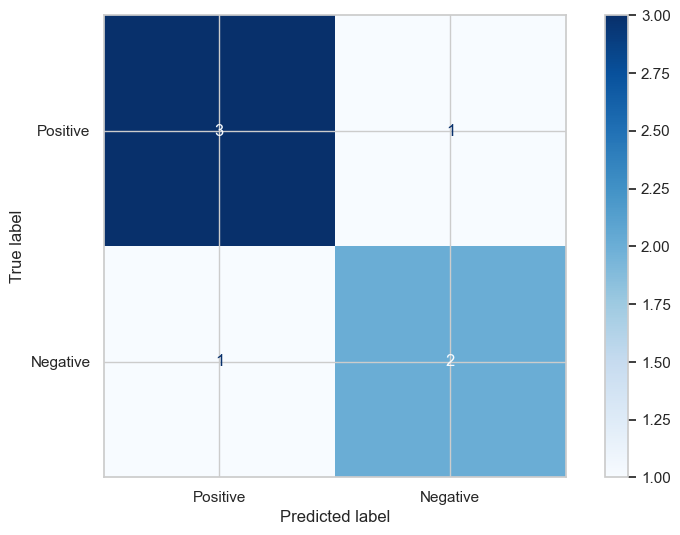

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 0, 1, 0, 0, 1, 1]

cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Positive", "Negative"])
disp.plot(cmap='Blues')
plt.show()
